<a href="https://colab.research.google.com/github/TONY00009/First-EDA-on-Playstore_Reviews/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
# Importing necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



## **IMPORTING DATA**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
playstore_data_path = '/content/drive/MyDrive/Playstore EDA/Data csv/Play Store Data.csv'
user_reviews_data_path = '/content/drive/MyDrive/Playstore EDA/Data csv/User Reviews.csv'


In [5]:
playstore_data_df = pd.read_csv(playstore_data_path)
user_reviews_df = pd.read_csv(user_reviews_data_path) 



---



## **DATA ANALYZING**

In [6]:
playstore_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
playstore_data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
user_reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')



---



## **DATA CLEANING**

In [10]:
# Inspecting playstore_data_df:
playstore_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
# Lets check the total number of null values in each column of playstore_data_df data set:
playstore_data_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
# Inspecting user_reviews_df:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [13]:
# Checking the total number of null values in each column of user_reviews_df data set:
user_reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### **Playstore Data**

In [14]:
# Lets deal with playstore_data_df's NULL values first:

# function to replace null values with median:
def fill_median(columns):
  columns = columns.fillna(columns.median())
  return columns

In [15]:
# Applying function to playstore_data_df's 'Rating' column:

playstore_data_df['Rating'] = playstore_data_df['Rating'].transform(fill_median)

In [16]:
# Mode values of remaining columns with NULL values:

print(playstore_data_df['Type'].mode())
print(playstore_data_df['Current Ver'].mode())
print(playstore_data_df['Android Ver'].mode())
print(playstore_data_df['Content Rating'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Everyone
dtype: object


In [17]:
# Replacing these columns with their respective Mode value:

# Filling Null values with mode:
playstore_data_df['Type'].fillna(playstore_data_df['Type'].mode()[0], inplace=True)
playstore_data_df['Current Ver'].fillna(playstore_data_df['Current Ver'].mode()[0], inplace=True)
playstore_data_df['Android Ver'].fillna(playstore_data_df['Android Ver'].mode()[0], inplace=True)
playstore_data_df['Content Rating'].fillna(playstore_data_df['Content Rating'].mode()[0], inplace=True)

In [18]:
playstore_data_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### **User Reviews Data**

In [19]:
#Dropping null values from user_reviews_df:

user_reviews_df = user_reviews_df.dropna()
user_reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [20]:
user_reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64



---



## **Checking Box-Plot**

### **For Playstore Data**

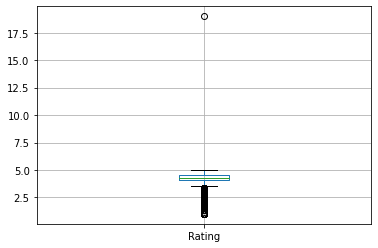

In [21]:
# Plotting Box-Plot:

playstore_data_df.boxplot();

In [22]:
# Checking for outlier:

playstore_data_df[playstore_data_df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


We can see that this specific row is having a lot of messed up data values not only in terms of an outlier for 'Rating' column but also for 'Genres' , 'Size' , 'Type' and many more .Hence we cannot gather any useful intel from this row therefore delering this row would be fine. 

In [23]:
# Dropping the row containing outlier:

playstore_data_df.drop([10472],inplace = True) 

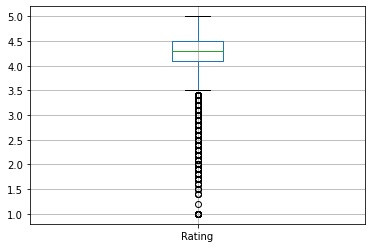

In [24]:
# Checking Box-Pot after removing Outlier:

playstore_data_df.boxplot();

### **For User Review Data**

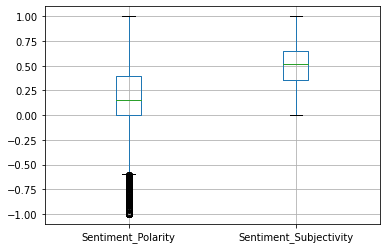

In [25]:
user_reviews_df.boxplot();

Now, the box-plot of both the data sets look fair enough to spot mean, min, max or other quantile values.




---



## **Converting the  Data Types of required columns to suitable formats to continue our EDA**

In [26]:
# Inspecting:
playstore_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
# Inspecting:
playstore_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### **Reviews**

In [28]:
# Converting 'Reviews' column to int data type: 

playstore_data_df['Reviews'] = playstore_data_df['Reviews'].astype(int)
playstore_data_df['Reviews'].dtype

dtype('int64')

For 'Size' and 'Price' columns we have delimeters like ($/M/K/,)\
So lets deal with them now...


### **Price**

In [29]:
# Inspecting:
playstore_data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [30]:
# Removing '$' from Price colummn and converting it to float type:

playstore_data_df['Price'] = playstore_data_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
playstore_data_df['Price'] = playstore_data_df['Price'].apply(lambda x: float(x))

### **Installs**

In [31]:
playstore_data_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [32]:
# Removing '+' and ',' from Installs colummn and converting it to float type:

playstore_data_df['Installs'] = playstore_data_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
playstore_data_df['Installs'] = playstore_data_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
playstore_data_df['Installs'] = playstore_data_df['Installs'].apply(lambda x: int(x))

### **Size**

In [33]:
playstore_data_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [34]:
# Function to convert mb into kb:

def converting_mb_into_kb(value):

  '''
  This function is used to convert Size of an application from Mb to kb and also to convert their respective data type
  
  '''


  if value[-1] == 'M':
    value = value.replace('M','')
    value = float(value)
    return (value*1024)

  elif value[-1] == 'k':
    value = value.replace('k' , '')
    value = float(value)
    return value

  else:
    return value

In [35]:
# Applying converting_mb_into_kb function to 'Size' column:

playstore_data_df['Size'] = playstore_data_df['Size'].apply(lambda x: converting_mb_into_kb(x))

### **Last Updated**

In [36]:
# Converting 'Last Updated' column to datetime format:

playstore_data_df['Last Updated'] = pd.to_datetime(playstore_data_df['Last Updated'])
playstore_data_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [37]:
# Extracting year from 'Last Updated' column:

playstore_data_df['Last Updated Year']=playstore_data_df['Last Updated'].dt.year
playstore_data_df['Last Updated Year'].reset_index()

,index,Last Updated Year
0,0,2018
1,1,2018
2,2,2018
3,3,2018
4,4,2018
...,...,...
10835,10836,2017
10836,10837,2018
10837,10838,2017
10838,10839,2015




---



### **Rechecking formats after making required changes..**

In [38]:
playstore_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                10840 non-null  object        
 1   Category           10840 non-null  object        
 2   Rating             10840 non-null  float64       
 3   Reviews            10840 non-null  int64         
 4   Size               10840 non-null  object        
 5   Installs           10840 non-null  int64         
 6   Type               10840 non-null  object        
 7   Price              10840 non-null  float64       
 8   Content Rating     10840 non-null  object        
 9   Genres             10840 non-null  object        
 10  Last Updated       10840 non-null  datetime64[ns]
 11  Current Ver        10840 non-null  object        
 12  Android Ver        10840 non-null  object        
 13  Last Updated Year  10840 non-null  int64         
dtypes: dat

In [39]:
# Inspecting
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


Also the columns for user_reviews_df are in the required format.

In [40]:
#looking at the min, max values,mean values etc from playstore_data_df: 
playstore_data_df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year
count,10840,10840,10840.000000,1.084000e+04,10840,1.084000e+04,10840,10840.000000,10840,10840,10840,10840,10840,10840.000000
unique,9659,33,NaN,NaN,460,NaN,2,NaN,6,119,1377,2831,33,NaN
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,NaN,Free,NaN,Everyone,Tools,2018-08-03 00:00:00,Varies with device,4.1 and up,NaN
freq,9,1972,NaN,NaN,1695,NaN,10040,NaN,8714,842,326,1467,2453,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-21 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-08 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,4.206476,4.441529e+05,NaN,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN,2017.399723
std,NaN,NaN,0.480342,2.927761e+06,NaN,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN,1.100914
min,NaN,NaN,1.000000,0.000000e+00,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2010.000000
25%,NaN,NaN,4.100000,3.800000e+01,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


In [41]:
#looking at the min, max values,mean values etc from user_reviews_df: 
user_reviews_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,37427,37427,37427,37427.000000,37427.000000
unique,865,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,312,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182171,0.492770
std,NaN,NaN,NaN,0.351318,0.259904
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000




---



## **Duplicates**

In [42]:
# Looking for duplicates in both data sets:

# For playstore_data_df:
playstore_identical_data = playstore_data_df.duplicated()
print(f'The number of duplicates in playstore_data_df data set are: {playstore_identical_data.sum()}')


# For user_reviews_df:
user_reviews_identical_data = user_reviews_df.duplicated()
print(f'The number of duplicates in user_reviews_df data set are: {user_reviews_identical_data.sum()}')


The number of duplicates in playstore_data_df data set are: 483
The number of duplicates in user_reviews_df data set are: 7735


In [43]:
# Shapes of both data sets before dropping duplicates:

print(f'{playstore_data_df.shape}')
print(f'{user_reviews_df.shape}')

(10840, 14)
(37427, 5)


In [44]:
#Remove Duplicates from Both data sets:

# For playstore_data_df data set:
playstore_data_df1 = playstore_data_df.drop_duplicates() 

# For user_reviews_df data set:
user_reviews_df1 = user_reviews_df.drop_duplicates() 


In [45]:
# Shapes of both data sets after dropping duplicates:

print(f'{playstore_data_df1.shape}')
print(f'{user_reviews_df1.shape}')

(10357, 14)
(29692, 5)




---



## **Before starting our EDA lets merge both data sets for better analysis**

In [46]:
df = playstore_data_df.merge(user_reviews_df, on="App")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72605 entries, 0 to 72604
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     72605 non-null  object        
 1   Category                72605 non-null  object        
 2   Rating                  72605 non-null  float64       
 3   Reviews                 72605 non-null  int64         
 4   Size                    72605 non-null  object        
 5   Installs                72605 non-null  int64         
 6   Type                    72605 non-null  object        
 7   Price                   72605 non-null  float64       
 8   Content Rating          72605 non-null  object        
 9   Genres                  72605 non-null  object        
 10  Last Updated            72605 non-null  datetime64[ns]
 11  Current Ver             72605 non-null  object        
 12  Android Ver             72605 non-null  object

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I hate,Negative,-0.800,0.900000


## **Exploratory Data Analysis**

###Let us first have a look at **correlations** among different column values:

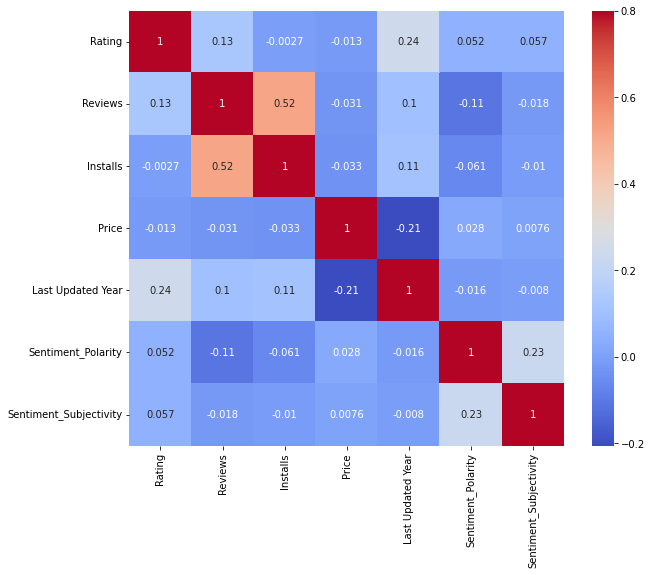

In [48]:
#correlation matrix
corrmat = df.corr()
h, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True ,annot = True, cmap="coolwarm");

From this corrleation heat map we can clearly see a strong positive correlation between **Reviews** and **Installs** column ....\
also, there is a bit of positive correlation between **Sentiment_Polarity** and **Rating**\
**Price** is in negative correlation with **Ratings** , **Reviews** and **Installs**



---



### Lets see the percentage of **Free** apps with  the **Paid** ones

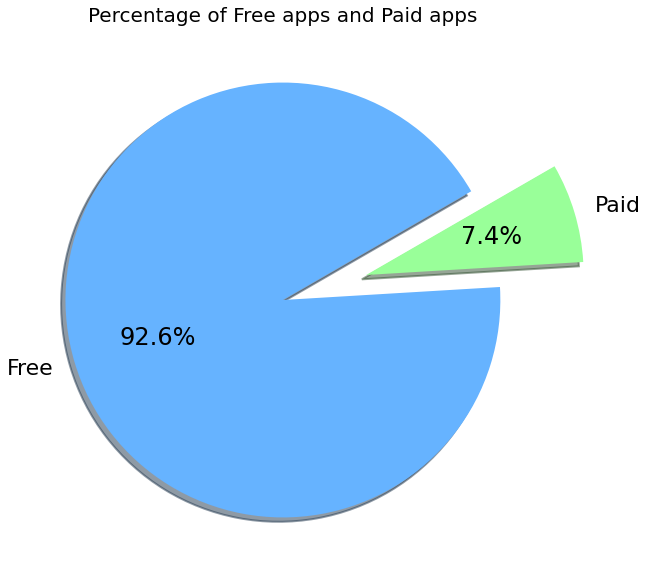

In [49]:
# Percentage of free apps with paid apps:

sns.set_context('poster')
plt.figure(figsize=(15,10))
x=playstore_data_df.Type.value_counts()
label=["Free","Paid"]
colors = ['#66b3ff','#99ff99',]
plt.pie(x,labels=label,autopct='%0.1f%%',shadow=True,startangle=30 , explode=[0, 0.4], colors = colors)
plt.title('Percentage of Free apps and Paid apps' , fontsize = 20)
plt.show()

Therefore, **≈93%** of the apps in google playstore are **Free**  
and around **≈7%** are the **Paid** ones



---



### TOP **Categories** with most number of apps

In [50]:
# Inspecting top apps category with most number of installs over playstore:

category_apps = playstore_data_df['Category'].value_counts().reset_index()
category_apps

,index,Category
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


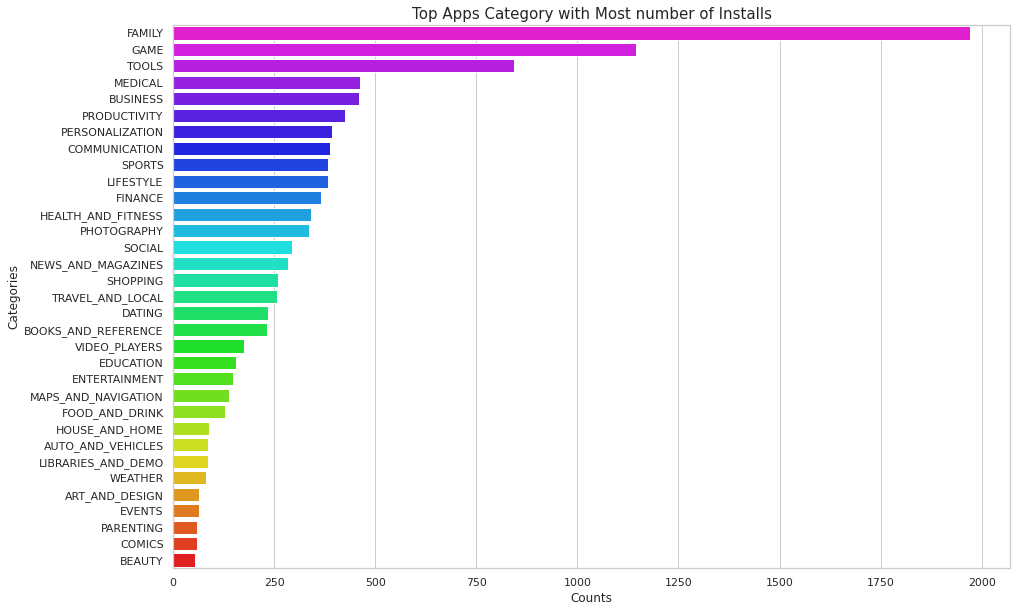

In [51]:
# Plotting a graph for the same:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(y= "index", x = "Category", data = category_apps, palette=("gist_rainbow_r"))
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Top Apps Category with Most number of Installs' , fontsize = 15)
plt.show()

**FAMILY** category has the highest number of installs\
Followed by **GAME** and then **TOOLS**



---



### Now lets see what are the top **Genres** in the playstore

In [52]:
# Inspecting top genres with most number of apps over playstore:

genres_apps = playstore_data_df['Genres'].value_counts().reset_index().head(10)
genres_apps

,index,Genres
0,Tools,842
1,Entertainment,623
2,Education,549
3,Medical,463
4,Business,460
5,Productivity,424
6,Sports,398
7,Personalization,392
8,Communication,387
9,Lifestyle,381


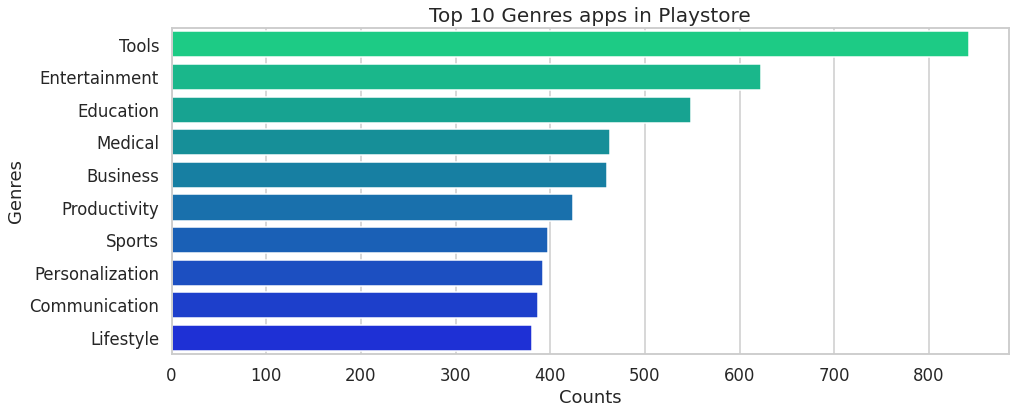

In [53]:
# Plotting a graph for the same:
sns.set_context('talk')
plt.figure(figsize=(15,6))
ax = sns.barplot(y= "index", x = "Genres", data = genres_apps, palette=("winter_r"))
plt.xlabel('Counts')
plt.ylabel('Genres')
plt.title('Top 10 Genres apps in Playstore' , fontsize = 20)
plt.show()

Therefore, Most of the apps are of **Tools** genre i.e ≈843



---



### **Age-group** wise distributions of apps

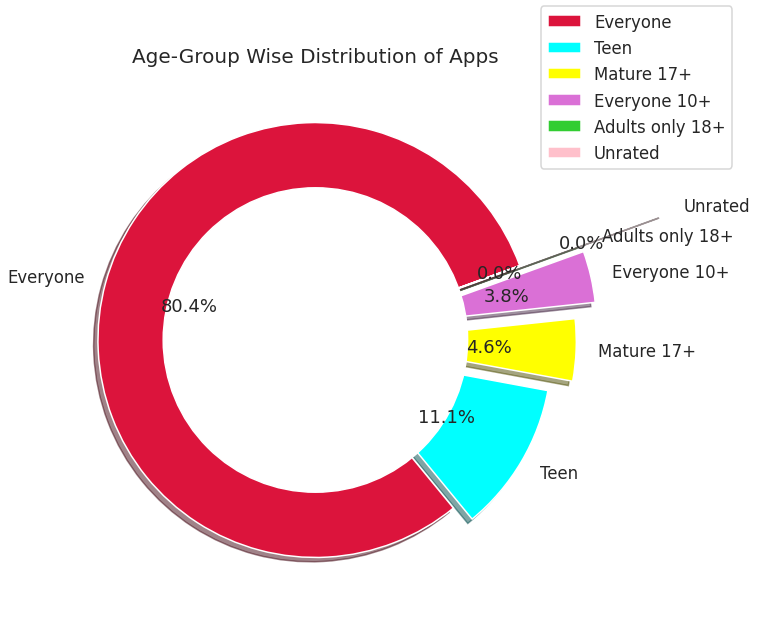

In [159]:
# Donut plot for visualization of Age-group wise distribution of apps in playstore:
sns.set_context('talk')
plt.figure(figsize=(12,10))
c = ['crimson' , 'cyan' , 'yellow' , 'orchid' , 'limegreen' , 'pink']
ex = [0.0 ,0.1 ,0.2 , 0.3 , 0.3 , 0.7]
plt.pie(list(playstore_data_df['Content Rating'].value_counts()),labels=list(playstore_data_df['Content Rating']
          .value_counts().keys()),autopct='%0.1f%%' , colors = c , shadow=True , explode = ex , startangle=20)

plt.legend(bbox_to_anchor=(0.9, 0.8))

# Adding a circle in the middle:
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Age-Group Wise Distribution of Apps' , fontsize = 20)
plt.show()

Most of apps in playstore are not biased on specific age groups and are available for **Everyone** **≈80%** \
i.e they do not have any **age-restrictions**.



---



### Which Year has the most number of app **updates** over playstore

In [56]:
# Number of apps updates over years (2010-2018)

year_installs = playstore_data_df['Last Updated Year'].value_counts().reset_index()
year_installs

,index,Last Updated Year
0,2018,7349
1,2017,1867
2,2016,804
3,2015,459
4,2014,209
5,2013,110
6,2012,26
7,2011,15
8,2010,1


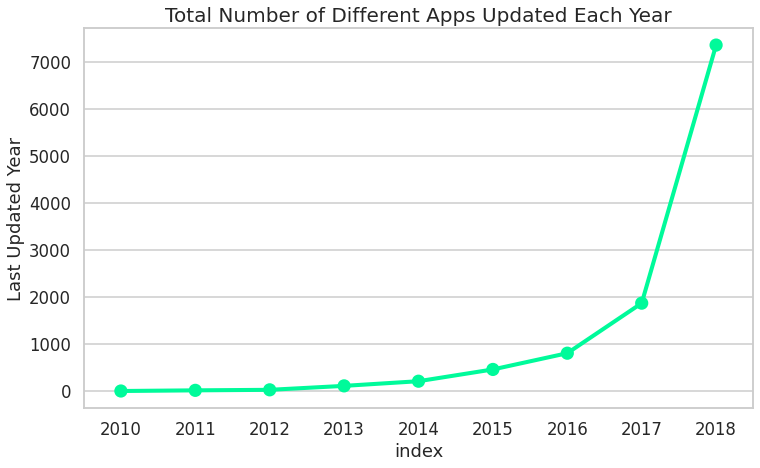

In [57]:
# Total Number of apps installed each year form 2010 to 2018

plt.figure(figsize=(12,7))
sns.pointplot(x = 'index', y='Last Updated Year', data=year_installs , color = 'mediumspringgreen')

plt.title('Total Number of Different Apps Updated Each Year' , fontsize = 20)
plt.show()

Year **2017 & 2018** has the most number of different apps updates...and can also be considered as the **Most Busiest** **year** for playstore !

## **Bi-Variate Analysis**

### Lets look at the **Most Reviewed Apps** over playstore

In [107]:
# Gathering info about most reviewed app:

most_famous_apps = playstore_data_df.groupby(['App'])['Reviews'].sum().reset_index().sort_values(by = 'Reviews' , ascending = False).head(10)
most_famous_apps

,App,Reviews
5399,Instagram,266241989
9041,WhatsApp Messenger,207348304
2564,Clash of Clans,179558781
6165,Messenger – Text and Video Chat for Free,169932272
8079,Subway Surfers,166331958
2364,Candy Crush Saga,156993136
4328,Facebook,156286514
101,8 Ball Pool,99386198
2561,Clash Royale,92530298
7889,Snapchat,68045010


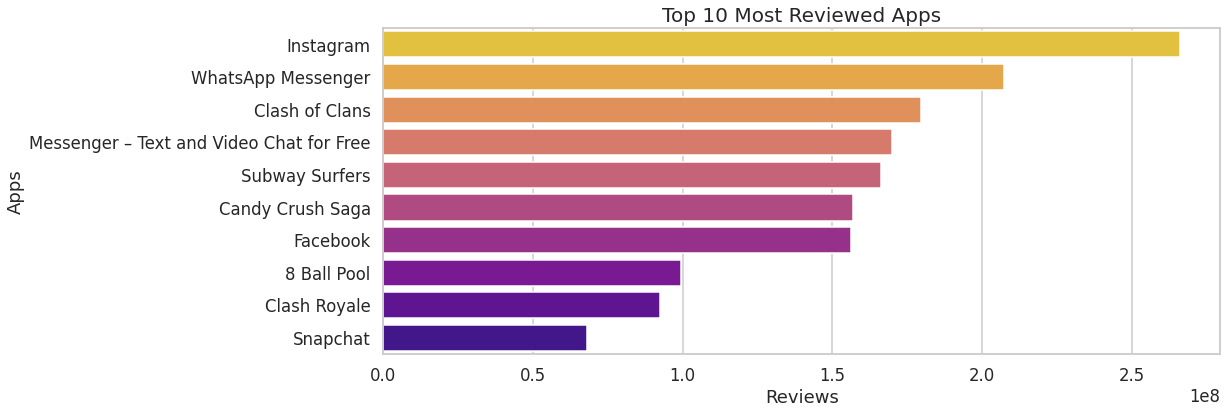

In [126]:
# Barplot to show top 10 most reviewed apps

sns.set_context('talk')
plt.figure(figsize=(15,6))
ax = sns.barplot(y= "App", x = "Reviews", data = most_famous_apps, palette=("plasma_r"))
plt.xlabel('Reviews')
plt.ylabel('Apps')
plt.title('Top 10 Most Reviewed Apps' , fontsize = 20)
plt.show()

**Instagram** is the **Most Reviewed** app over playstore with a total of over **26 Hundred Million** reviews followed by **WhatsApp Messenger**, **Clash of Clans** and others..

In [160]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love enjoyable fun,Positive,0.433333,0.466667


### **App** with the most number of **Positive Reviews**

In [172]:
plt.figure(figsize = (15,6))
most_famous_apps = df.groupby(['App'])['Sentiment'].count().reset_index().sort_values(by = 'Sentiment' , ascending = False).head(20)
most_famous_apps

,App,Sentiment
238,Bowmasters,1872
468,Duolingo: Learn Languages Free,1680
308,Candy Crush Saga,1680
769,Helix Jump,1638
269,"CBS Sports App - Scores, News, Stats & Watch Live",1536
19,8 Ball Pool,1533
109,Angry Birds Classic,1365
302,Calorie Counter - MyFitnessPal,1270
670,Garena Free Fire,888
252,Bubble Shooter,870


<Figure size 1080x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(y = most_famous_apps["Sentiment_Polarity"],x = merged_df["Type"],palette="Blues" )
plt.show()

In [180]:
category_apps = playstore_data_df['Category'].value_counts().reset_index().head()
category_apps

,index,Category
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460


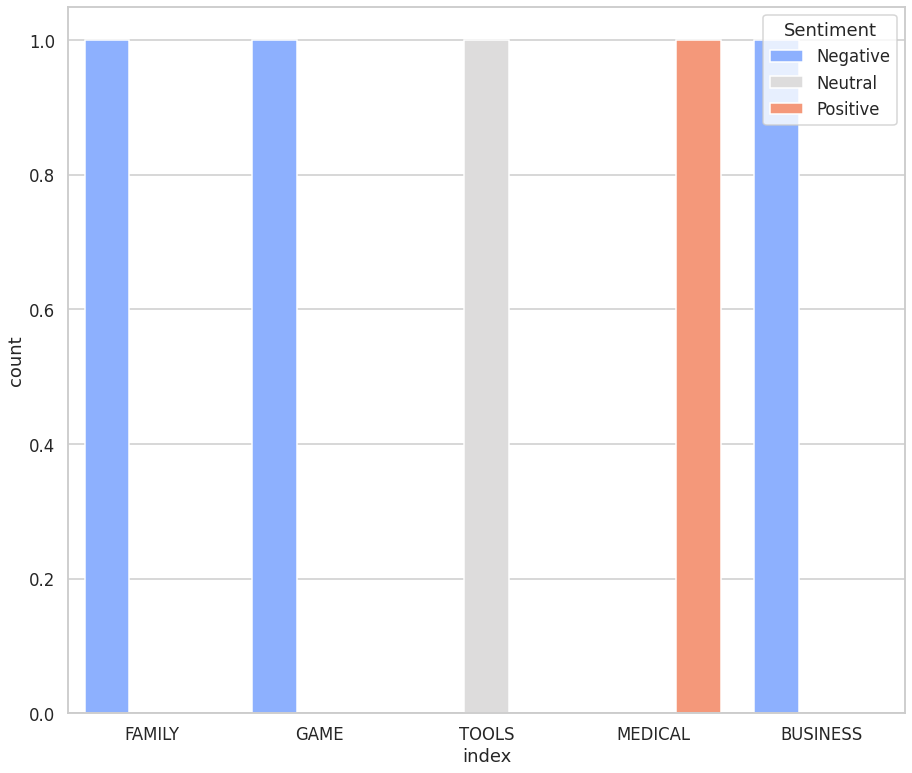

In [186]:
plt.figure(figsize = (15,13))
sns.countplot(x =category_apps['index'], hue = "Sentiment", data = df , palette = 'coolwarm' , saturation = 1)
plt.show()